In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [2]:
mu = 0.151

In [3]:
def cos_fun(num):
    return 1.5 * np.cos(num)

In [4]:
def normfun(x, mu_, sigma):
    pdf = np.exp(-((x - mu_)**2)/(2*sigma**2))# / (sigma * np.sqrt(2*np.pi))
    return pdf

In [5]:
def get_N(soliton, step):
    length = int(2 * np.pi / step)
    N_ = np.zeros(length)
    for i in range(len(soliton)):
        N_[i] = soliton[i] ** 2 * step
    return sum(N_)

## 非线性薛定谔方程求孤子

\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) = \mu\phi(x)
\end{equation}
# $\mu$ 为常数，等式相等即
\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) - \mu\phi(x) = 0
\end{equation}

---
# 有限差分法，离散二阶导
\begin{equation}
f'' = \frac{f(x+\Delta x) + f(x-\Delta x)-2f(x)}{(\Delta x)^2}
\end{equation}

In [6]:
def fun(f):
    step=32*np.pi/2048
    F = np.zeros(len(f))
    
    field = np.arange(-16*np.pi, 16*np.pi, 32*np.pi/2048)
    cos_f = cos_fun(field)
    
    # 第0
    F[0] = - 0.5 * \
           ((f[1] - 2 * f[0]) / step ** 2) + \
           cos_f[0] * f[0] + \
           np.abs(f[0]) ** 2 * f[0] - mu * f[0]
    # 最后一项
    F[-1] = - 0.5 * \
           ((f[-2] - 2 * f[-1]) / step ** 2) + \
           cos_f[-1] * f[-1] + \
           np.abs(f[-1]) ** 2 * f[-1] - mu * f[-1]
    # 第1到第N-1
    for i in range(1, len(F)-1):
        F[i] = - 0.5 * \
           ((f[i+1] + f[i-1] - 2 * f[i]) / step ** 2) + \
           cos_f[i] * f[i] + \
           np.abs(f[i]) ** 2 * f[i] - mu * f[i]
    return F

## 第一线性带 周期势阱为 $1.5cos(x)$ 时候的初始解$0.1*normal(\mu=\pi, \sigma=0.5)$  $\mu=-0.92$
## $mu = 0.151$ 初始解 $1.5*normal(\mu=\pi, \sigma=0.5)$

In [7]:
def init(x):
    #return np.cosh(x-np.pi) * 1.5 * normfun(x, 0, 1)
    #return 1.5 * normfun(x, np.pi, 0.5) * np.cosh(x - np.pi)
    #return 1 * normfun(x, np.pi, 1) * np.sin(x)
    #return -5 * np.cos(x - np.pi) * normfun(x, np.pi, 1)
    return 1.5 * normfun(x, np.pi, 0.5)

In [8]:
N = 2048
field = np.arange(-16*np.pi, 16*np.pi, 32*np.pi / N)


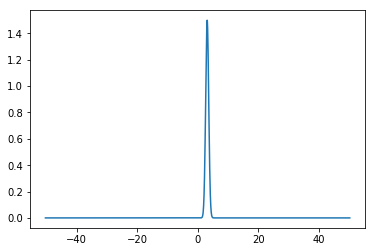

In [9]:
xx = init(field)
nf = normfun(field, np.pi, 0.5)
plt.plot(field, xx)
plt.show()

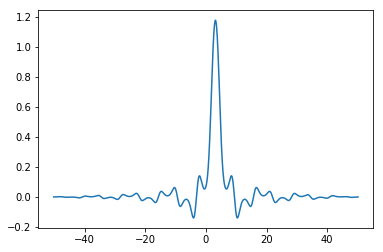

In [10]:
rslt = fsolve(fun, xx)
plt.plot(field, rslt)
plt.show()

In [11]:
sum((rslt ** 2) * (32*np.pi/2048))

3.326765264921389

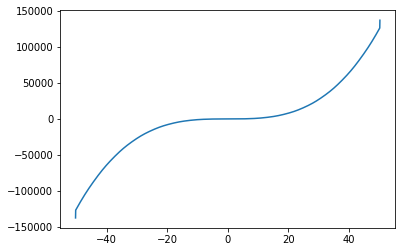

In [12]:
z = fun(field)
plt.plot(field, z)

H=diag(0.5*((-N:N).^2+2*(-N:N).*0+ones(1,1:2*N+1)*0^2))+diag(ones(1,2*N)*v/2,1)+diag(ones(1,2*N)*v/2,-1)

In [105]:
# 定义 N = 20
n = 20
v = 2

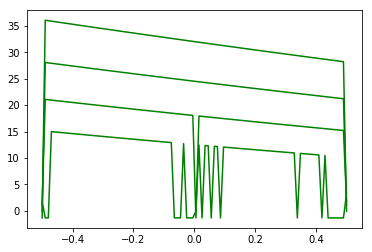

In [156]:
def linear_gap_calculation(k):
    '''
    线性带的计算，k 为参数
    超参数 n = 20
    '''
    diag_mx = np.arange(-n, n+1, 1)
    a = np.ones((2 * n + 1))
    H = np.diag(0.5 * (diag_mx ** 2 + 2 * diag_mx * k + a * k ** 2))+ \
            np.diag(np.ones((2 * n)) * v / 2, 1) + np.diag(np.ones((2 * n)) * v / 2, -1)
    eig_value, eig_v = np.linalg.eig(H)
    return eig_value, eig_v

def gnrt_linear_graph():
    x = np.linspace(-0.5, 0.5, 100)
    value_lst = np.array([linear_gap_calculation(i)[0] for i in x]).T
    for i in value_lst[12:16]:
        #print(i)
        plt.plot(x, i, 'g-')
    plt.show()
    return value_lst

a = gnrt_linear_graph()
    

In [153]:
b = np.array([[1,2,3],[2,3,4]])
b

array([[1, 2, 3],
       [2, 3, 4]])

In [152]:
for i in b:
    print(i)

[1 2 3]
[2 3 4]


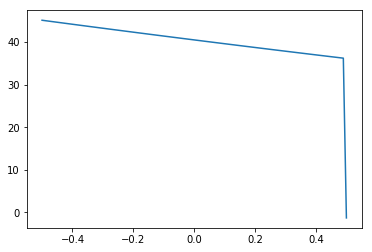

In [150]:
plt.plot(np.linspace(-0.5, 0.5, 100), a[-30])

\begin{equation}
\frac{1-cos x}{xtanx} = \frac{2sin^2 {\frac{x}{2}}}{xtanx} = \frac{sinx/2}{x/2}*\frac{sinx/2}{tanx} = \frac{sinx/2}{tanx} = 0.5
\end{equation}